In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf #for getting r**2 values
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load and Explore the Data

In [2]:
data=pd.read_csv("ToyotaCorolla - MLR.csv")

In [3]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [4]:
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [5]:
data.shape

(1436, 11)

In [6]:
data.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [7]:
data.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

# Visualize the Data

<AxesSubplot:>

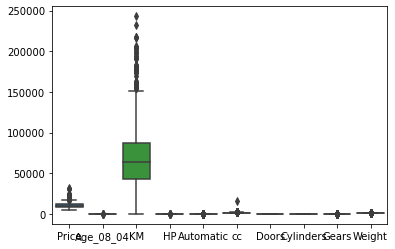

In [8]:
sns.boxplot(data=data)

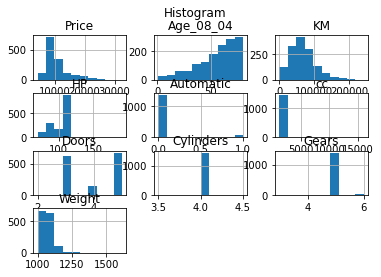

In [9]:
data.hist()
plt.suptitle("Histogram")
plt.show()

In [10]:
data.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,NaN,0.020613,1.000000


In [11]:
data.drop(columns=['Cylinders'], inplace=True)

In [12]:
data.drop(columns=['Fuel_Type'], inplace=True)

In [13]:
data.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,90,0,2000,3,5,1165
1,13750,23,72937,90,0,2000,3,5,1165
2,13950,24,41711,90,0,2000,3,5,1165
3,14950,26,48000,90,0,2000,3,5,1165
4,13750,30,38500,90,0,2000,3,5,1170


In [14]:
data.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,-0.160141,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,0.020613,1.000000


<AxesSubplot:>

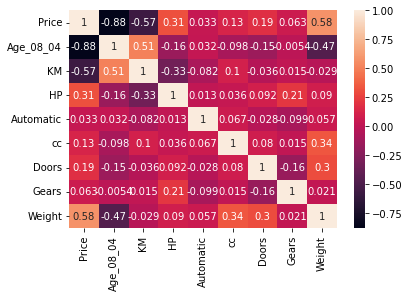

In [15]:
sns.heatmap(data.corr(),annot=True)

# Split the Dataset into Training and Testing Sets

In [16]:
X = data.drop(['Price'],axis=1)
Y = data[['Price']]

In [17]:
X.shape

(1436, 8)

In [18]:
Y.shape

(1436, 1)

In [19]:
sc= StandardScaler()

In [20]:
x= sc.fit_transform(data)
x

array([[ 0.76376268, -1.77196633, -0.57469494, ..., -1.08513865,
        -0.14042519,  1.75856113],
       [ 0.83271485, -1.77196633,  0.11745379, ..., -1.08513865,
        -0.14042519,  1.75856113],
       [ 0.88787659, -1.71818412, -0.71538641, ..., -1.08513865,
        -0.14042519,  1.75856113],
       ...,
       [-0.6152808 ,  0.80957948, -1.37403589, ..., -1.08513865,
        -0.14042519, -1.09191497],
       [-0.96004167,  0.75579727, -1.37670303, ..., -1.08513865,
        -0.14042519, -1.09191497],
       [-1.04278428,  1.0784905 , -1.82784925, ...,  1.014941  ,
        -0.14042519,  0.78939926]])

In [21]:
categorical_cols = data.select_dtypes(include=['float64','category']).columns
categorical_cols 

Index([], dtype='object')

In [22]:
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight
0,23,46986,90,0,2000,3,5,1165
1,23,72937,90,0,2000,3,5,1165
2,24,41711,90,0,2000,3,5,1165
3,26,48000,90,0,2000,3,5,1165
4,30,38500,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1300,3,5,1025
1432,72,19000,86,0,1300,3,5,1015
1433,71,17016,86,0,1300,3,5,1015
1434,70,16916,86,0,1300,3,5,1015


In [23]:
if X_encoded.isnull().any().any():
    print("\nWarning: NaN values detected after conversion, indicating hidden strings were present.")
    
print(X_encoded.isnull().sum())  # Show where NaNs were introduced

Age_08_04    0
KM           0
HP           0
Automatic    0
cc           0
Doors        0
Gears        0
Weight       0
dtype: int64


In [24]:
# Drop rows with NaN values if needed (result of coercion)
X_encoded = X_encoded.dropna()
X_encoded

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight
0,23,46986,90,0,2000,3,5,1165
1,23,72937,90,0,2000,3,5,1165
2,24,41711,90,0,2000,3,5,1165
3,26,48000,90,0,2000,3,5,1165
4,30,38500,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1300,3,5,1025
1432,72,19000,86,0,1300,3,5,1015
1433,71,17016,86,0,1300,3,5,1015
1434,70,16916,86,0,1300,3,5,1015


# Build and Compare a Minimum of Three Different Models

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.20,random_state=227,shuffle=True)

In [27]:
X_train,X_test,Y_train,Y_test

(      Age_08_04      KM   HP  Automatic    cc  Doors  Gears  Weight
 576          46   34000  110          0  1600      5      5    1075
 212          34   78677  110          1  1600      5      5    1105
 608          65  176184   72          0  2000      3      5    1115
 1214         79   86000   86          0  1300      5      5    1040
 927          67   56074   86          0  1300      4      5    1000
 ...         ...     ...  ...        ...   ...    ...    ...     ...
 1414         80   42186  110          0  1600      3      5    1050
 1231         76   83405  110          0  1600      5      5    1070
 386          53  143513   69          0  1900      5      5    1140
 872          67   62316  110          0  1600      3      5    1050
 32           27   29510   97          0  1400      3      5    1100
 
 [1148 rows x 8 columns],
       Age_08_04      KM   HP  Automatic    cc  Doors  Gears  Weight
 1426         78   30964  110          1  1600      3      4    1080
 575  

In [28]:
# Training Sample
X_train.shape, Y_train.shape

((1148, 8), (1148, 1))

In [29]:
# Testing Sample
X_test.shape, Y_test.shape

((288, 8), (288, 1))

**Model 1: Standard Multiple Linear Regression**

In [30]:
LinearRegression = LinearRegression().fit(X_train,Y_train)

In [31]:
y_predict_train =LinearRegression.predict(X_test)

In [32]:
# Evaluate the model
mse = mean_squared_error(Y_test, y_predict_train)
r2 = r2_score(Y_test, y_predict_train)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2827899.6819004635
R-squared: 0.7913025966775515


**Model 2: Lasso Regression**

In [33]:
from sklearn.linear_model import Lasso, Ridge

In [34]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, Y_train)
lasso_pred = lasso.predict(X_test)
print(f"Lasso R-squared: {r2_score(Y_test, lasso_pred)}")

Lasso R-squared: 0.7912326114328774


**Model 3: Ridge Regression**

In [35]:
# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, Y_train)
ridge_pred = ridge.predict(X_test)
print(f"Ridge R-squared: {r2_score(Y_test, ridge_pred)}")

Ridge R-squared: 0.7912757445833304


# Evaluate all models using MSE and R-squared

In [36]:
mse1, r2_1 = mean_squared_error(Y_test, y_predict_train), r2_score(Y_test, y_predict_train)
mse2, r2_2 = mean_squared_error(Y_test, lasso_pred), r2_score(Y_test, lasso_pred)
mse3, r2_3 = mean_squared_error(Y_test, ridge_pred), r2_score(Y_test, ridge_pred)

# Display model performance
print(f"Model 1 - Standard MLR: MSE = {mse1:.2f}, R-squared = {r2_1:.2f}")
print(f"Model 2 - Lasso Regression: MSE = {mse2:.2f}, R-squared = {r2_2:.2f}")
print(f"Model 3 - Ridge Regression: MSE = {mse3:.2f}, R-squared = {r2_3:.2f}")

Model 1 - Standard MLR: MSE = 2827899.68, R-squared = 0.79
Model 2 - Lasso Regression: MSE = 2828848.00, R-squared = 0.79
Model 3 - Ridge Regression: MSE = 2828263.53, R-squared = 0.79


# Interview Questions

### 1.What is Normalization & Standardization and how is it helpful?

Normalization is a technique used to scale numerical data in the range of 0 to 1. This technique is useful when the distribution of the data is not known or when the data is not normally distributed. On the other hand, standardization is a technique used to transform data into a standard normal distribution.

### 2.What techniques can be used to address multicollinearity in multiple linear regression?

1. Remove highly correlated predictors from the model. If you have two or more factors with a high VIF, remove one from the model.
2. Use Partial Least Squares Regression (PLS) or Principal Components Analysis, regression methods that cut the number of predictors to a smaller set of uncorrelated components.